IA & Data science (LU3IN0226) -- 2021-2022
--------
*&copy; Equipe pédagogique: Vincent Guigue, Christophe Marsala, Olivier Schwander.*

# TD-TME09: algorithmes d'apprentissage non-supervisé

L'objectif de ce TP est d'implémenter des algorithmes d'apprentissage non-supervisé, en particulier, l'algorithme de classification hiérarchique.

<font color="RED" size="+1">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

KABONGO BUZANGU Ben

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>tme-09</tt> et rajouter à la suite de <tt>tme-09</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au fichier à poster** : *tme-09-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme
- ne pas compresser ou faire une archive: il faut rendre le fichier ipython tel quel, éventuellement, si vous avez d'autres fichiers vous les rendez séparément.

**Echancier pour la soumission de votre compte-rendu:**
- le compte-rendu d'une séance doit être remis obligatoirement <font color="RED">avant la séance suivante</font>.

**Le compte-rendu est soumis sur la page Moodle.**


## Préparation

L'archive récupérée avec ce fichier contient aussi le répertoire <code>data</code> qui contient les bases pour expérimenter vos fonctions.

In [1]:
# Importation des librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire frère du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
from iads import utils as ut

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

## Travail à réaliser

Le travail à faire se décompose en 2 phases :
- dans un premier temps, le travail porte sur la base d'apprentissage <code>base-2D.csv</code> qui contient des exemples décrits dans $R^2$. Ainsi, il est plus aisé de visualiser les résultats des fonctions à écrire ;
- dans un second temps, les fonctions écrites dans la phase précédente sont à utiliser avec la base d'apprentissage `base-Paris.csv`.

**Attention**: vos fonctions doivent **dès leur création** pouvoir s'appliquer **quelle que soit la dimension** des exemples traités.

## Phase 1: implémentation des fonctions de base

### Chargement du fichier "base_2D.csv"

Charger le fichier `base_2D.csv` et, par exemple avec la fonction `read_csv` de pandas. Le résultat est stocké sous la forme d'un dataframe.

In [2]:
data_2D = pd.read_csv('./data/base-2D.csv')
print("Il y a", len(data_2D), "exemples dans la base.")

Il y a 14 exemples dans la base.


In [3]:
# Le dataframe:
data_2D

,X,Y
0,0.0,4.0
1,1.0,3.5
2,1.0,1.0
3,2.0,1.0
4,2.0,2.0
5,4.0,4.0
6,4.0,5.0
7,4.0,6.0
8,4.5,1.0
9,4.5,6.0


<font size="+1" color="RED">**[Q]**</font> Afficher la base sous forme graphique.


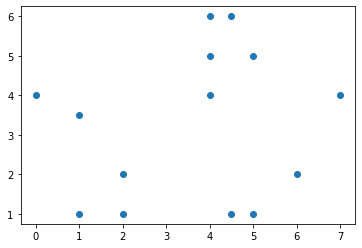

In [4]:
plt.scatter(data_2D['X'], data_2D['Y'])

## Fonctions préliminaires

### Normalisation des données

<font size="+1" color="RED"><b>[Q]</b></font> Donner les instructions permettant d'afficher les valeurs minimales et maximales de chaque colonne du dataframe `base_2D`.

Remarque : soyez général ! Il faut que ces instructions restent valables quel que soit le dataframe donné (noms et nombre de colonnes non connus au départ par exemple).


In [5]:
print('Minimum et maximum de chaque colonne:')
for col in data_2D.columns:
    print(f'colonne {col} : {np.min(data_2D[col])} {np.max(data_2D[col])}')

Minimum et maximum de chaque colonne:
colonne X : 0.0 7.0
colonne Y : 1.0 6.0


<font size="+1" color="RED"><b>[Q]</b></font> Ecrire la fonction <code>normalisation</code> qui prend en argument un <code>DataFrame</code> et rend le dataframe obtenu en normalisant chaque colonne de ce <code>DataFrame</code> (ie. les valeurs de la matrice résultat doivent être dans l'intervalle $[0,1])$.


In [6]:
def normalisation(in_df):
    arr = np.array(in_df)
    min_ = np.min(arr, axis=0)
    max_ = np.max(arr, axis=0)
    diff = max_ - min_
    diff[diff==0] = 1
    out = ((arr-min_)/diff)
    return pd.DataFrame(out, columns=in_df.columns)

<font size="+1" color="RED"><b>[Q]</b></font> Normaliser les données de la base-2D et afficher leur représentation graphique: vérifier que le tracé est le même que celui obtenu avant la normalisation (aux valeurs des axes près).

In [7]:
data_2D_norm = normalisation(data_2D)

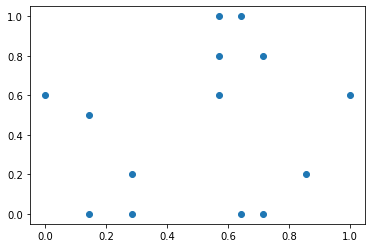

In [8]:
plt.scatter(data_2D_norm['X'], data_2D_norm['Y'])

### Distances entre exemples

<font size="+1" color="RED"><b>[Q]</b></font> Ecrire la fonction <code>dist_euclidienne</code> qui prend en argument deux exemples sous la forme de vecteurs (Dataframe ou np.array) et rend leur distance euclidienne. 

In [9]:
def dist_euclidienne(arr1, arr2):
    return np.sqrt(np.sum((arr1 - arr2) ** 2))

In [10]:
v1= data_2D_norm.iloc[0]
v2= data_2D_norm.iloc[1]
print("v1 : ",v1, "\nv2 : ",v2)
print("distance euclidienne entre v1 et v2 : ", dist_euclidienne(v1,v2))

v1 :  X    0.0
Y    0.6
Name: 0, dtype: float64 
v2 :  X    0.142857
Y    0.500000
Name: 1, dtype: float64
distance euclidienne entre v1 et v2 :  0.17437936593905287


In [11]:
# Remarque : si elle est bien écrite, la fonction doit fonctionner aussi pour un np.array:

v1= np.array(data_2D_norm.iloc[0])
v2= np.array(data_2D_norm.iloc[1])
print("v1 : ",v1, "\nv2 : ",v2)
print("distance euclidienne entre v1 et v2 : ", dist_euclidienne(v1,v2))

v1 :  [0.  0.6] 
v2 :  [0.14285714 0.5       ]
distance euclidienne entre v1 et v2 :  0.17437936593905287


In [12]:
# autre exemples:
v3= np.array([0,0,0])
v4= np.array([1,1,1])
print("v3 : ",v3, "\nv4 : ",v4)
print("distance euclidienne entre v3 et v4 : ", dist_euclidienne(v3,v4))
v5= np.array([0,0,0])
v6= np.array([-1,0,1])
print("v5 : ",v5, "\nv6 : ",v6)
print("distance euclidienne entre v5 et v6 : ", dist_euclidienne(v5,v6))

v3 :  [0 0 0] 
v4 :  [1 1 1]
distance euclidienne entre v3 et v4 :  1.7320508075688772
v5 :  [0 0 0] 
v6 :  [-1  0  1]
distance euclidienne entre v5 et v6 :  1.4142135623730951


<font size="+1" color="RED">**[Q]**</font> Sur le même modèle, écrire la fonction <code>dist_manhattan</code> qui prend en argument deux exemples et rend leur distance de Manhattan. 

In [13]:
def dist_manhattan(arr1, arr2):
    return np.sum(np.abs(arr1-arr2))

In [14]:
# Exemple d'utilisation sur les 2 premiers exemples de la base:
v1= data_2D_norm.iloc[0]
v2= data_2D_norm.iloc[1]
print("v1 : ",v1, "\nv2 : ",v2)
print("distance de Manhattan entre v1 et v2 : ", dist_manhattan(v1,v2))

v1 :  X    0.0
Y    0.6
Name: 0, dtype: float64 
v2 :  X    0.142857
Y    0.500000
Name: 1, dtype: float64
distance de Manhattan entre v1 et v2 :  0.24285714285714283


In [15]:
# autre exemples:
v3= np.array([0,0,0])
v4= np.array([1,1,1])
print("v3 : ",v3, "\nv4 : ",v4)
print("distance de Manhattan entre v3 et v4 : ", dist_manhattan(v3,v4))
v5= np.array([0,0,0])
v6= np.array([-1,0,1])
print("v5 : ",v5, "\nv6 : ",v6)
print("distance de Manhattan entre v5 et v6 : ", dist_manhattan(v5,v6))

v3 :  [0 0 0] 
v4 :  [1 1 1]
distance de Manhattan entre v3 et v4 :  3
v5 :  [0 0 0] 
v6 :  [-1  0  1]
distance de Manhattan entre v5 et v6 :  2


<font size="+1" color="RED"><b>[Q]</b></font>Ecrire la fonction <code>dist_vect</code> qui prend en argument une chaîne de caractères (soit la chaîne "euclidienne", soit "manhattan") ainsi que deux vecteurs et qui rend leur distance soit euclidienne, soit de Manhattan selon le cas.

In [16]:
def dist_vect(function, arr1, arr2):
    if function == 'euclidienne':
        return dist_euclidienne(arr1, arr2)
    if function == 'manhattan':
        return dist_manhattan(arr1, arr2)

In [17]:
v1= data_2D_norm.iloc[0]
v2= np.array(data_2D_norm.iloc[1])
print("v1 : ",v1, "\nv2 : ",v2)

for nom in ["euclidienne", "manhattan"] :
    print("distance ", nom, " entre v1 et v2 :\t", dist_vect(nom,v1,v2))


v1 :  X    0.0
Y    0.6
Name: 0, dtype: float64 
v2 :  [0.14285714 0.5       ]
distance  euclidienne  entre v1 et v2 :	 0.17437936593905287
distance  manhattan  entre v1 et v2 :	 0.24285714285714283


### Calcul de centroides

<font size="+1" color="RED"><b>[Q]</b></font> Ecrire la fonction <code>centroide</code> qui, étant donné un dataframe (ou un np.array) contenant plusieurs exemples rend leur centre de gravité (centroide).
On fait l'hypothèse qu'il y a toujours au moins un exemple.


In [18]:
def centroide(arr):
    return np.mean(arr, axis=0)

In [19]:
centroide(data_2D_norm)

X    0.510204
Y    0.450000
dtype: float64

In [20]:
# Remarque : si elle est bien écrite, la fonction doit fonctionner aussi pour un np.array:
centroide( np.array(data_2D_norm) )

array([0.51020408, 0.45      ])

### Distances entre groupes d'exemples


La distance entre deux groupes d'exemples correspond à la distance entre leurs centroïdes (approche "centroid linkage"). Pour cette approche, on prendra seulement la distance euclidienne.

<font size="+1" color="RED"><b>[Q]</b></font> Ecrire la fonction <code>dist_centroides</code> qui prend en argument deux groupes de vecteurs (dataframe ou np.array) et qui rend leur distance euclidienne.


In [21]:
def dist_centroides(arr1, arr2):
    return dist_euclidienne(centroide(arr1), centroide(arr2))

In [22]:
# Par exemple:
dist_centroides(data_2D_norm.iloc[0:4],data_2D_norm.iloc[5:13])

0.586345478713841

## L'algorithme de classification hiérarchique

Dans la suite de cet exercice, une partition (qui est un groupe de clusters) est représentée par une structure de données de type dictionnaire (<code>dict()</code> en python) :
- la clé est un numéro de cluster (sous la forme d'un entier naturel) ;
- la valeur associée est un liste contenant les indices des exemples qui sont dans le cluster correspondant.

Les indices sont ceux du dataframe qui contient la base initiale.

<b>Dans ce qui suit, on appelle "partition" un tel dictionnaire.</b>


Rappel: `iloc` accepte une liste d'indices pour extraire des lignes d'un dataframe...

In [23]:
data_2D_norm.iloc[[0,3,1]]

,X,Y
0,0.000000,0.6
3,0.285714,0.0
1,0.142857,0.5


<font size="+1" color="RED"><b>[Q]</b></font> Ecrire la fonction <code>initialise</code> qui, étant donné un dataframe DF, rend une partition contenant autant d'entrées que d'exemples dans DF. La clé de chaque entrée sera le numéro de l'exemple.

In [24]:
def initialise(df):
    return {i:[i] for i in range(len(df))}

In [25]:
# Par exemple:
depart = initialise(data_2D_norm)
depart

{0: [0],
 1: [1],
 2: [2],
 3: [3],
 4: [4],
 5: [5],
 6: [6],
 7: [7],
 8: [8],
 9: [9],
 10: [10],
 11: [11],
 12: [12],
 13: [13]}

### Variante 1: chaînage par centroides

On souhaite implémenter ici l'algorithme de classification hiérarchique basé sur l'utilisation d'un chaînage par centroides (approche "centroid linkage").

On commence par implémenter une fonction qui, étant donné une partition, permet de regrouper les 2 clusters les plus proches. Ces 2 clusters sont alors fusionnés pour n'en former qu'un seul qui est ajouté à la partition, alors que les 2 clusters initiaux sont retirés de la partition.

On fait l'hypothèse que la partition initiale contient au moins 2 groupes.

<font size="+1" color="RED"><b>[Q]</b></font> Ecrire la fonction <code>fusionne</code> qui prend en argument un dataframe contenant des exemples et une partition P0 et qui rend le tuple composé des 4 valeurs suivantes:
- la partition P1 obtenue après fusion des 2 clusters de P0 les plus proches ;
- les clés des 2 clusters de P0 qui ont été fusionnés et qui ne sont donc plus dans P1 ;
- la distance qui séparait ces 2 clusters, calculée selon le nom de distance donné.

Vous rajouterez un troisième argument (avec valeur par défaut) à la fonction : `verbose=False` qui indique si un message doit être affiché à la fin de la fonction donnant le nom des 2 éléments fusionnés et leur distance.

In [26]:
def fusionne(df, in_partition, verbose=False):
    dist_min = +np.inf
    k1_min, k2_min = -1, -1
    for k1, v1 in in_partition.items():
        for k2, v2 in in_partition.items():
            if k1 == k2:
                continue
            dist = dist_centroides(df.iloc[v1], df.iloc[v2])
            if dist < dist_min:
                dist_min = dist
                k1_min, k2_min = k1, k2
    out_partition = dict(in_partition)
    if k1_min != -1:
        del out_partition[k1_min]
        del out_partition[k2_min]
        out_partition[max(in_partition)+1] = [*in_partition[k1_min], *in_partition[k2_min]]
        if verbose:
            print(f'Distance mininimale trouvée entre  [{k1_min}, {k2_min}]  =  {dist_min}')
    return out_partition, k1_min, k2_min, dist_min

In [27]:
# Exemple:
fusionne(data_2D_norm, depart)

({0: [0],
  1: [1],
  2: [2],
  3: [3],
  4: [4],
  5: [5],
  6: [6],
  7: [7],
  9: [9],
  11: [11],
  12: [12],
  13: [13],
  14: [8, 10]},
 8,
 10,
 0.0714285714285714)

In [28]:
# Exemple avec verbose:
fusionne(data_2D_norm, depart,verbose=True)

Distance mininimale trouvée entre  [8, 10]  =  0.0714285714285714


({0: [0],
  1: [1],
  2: [2],
  3: [3],
  4: [4],
  5: [5],
  6: [6],
  7: [7],
  9: [9],
  11: [11],
  12: [12],
  13: [13],
  14: [8, 10]},
 8,
 10,
 0.0714285714285714)

<font size="+1" color="RED"><b>[Q]</b></font> Ecrire la fonction <code>clustering_hierarchique</code> qui prend en argument un dataframe et rend une liste composée de listes contenant chacune:
- les 2 indices d'éléments fusionnés
- la distance les séparant
- la somme du nombre d'éléments des 2 éléments fusionnés

Remarque: chaque sous-liste contient donc les 3 dernières valeurs du résultats de `fusionne()`.


In [29]:
def clustering_hierarchique(df):
    partition = initialise(df)
    results = []
    for _ in range(len(df)):
        partition, k1, k2, dist = fusionne(df, partition)
        results.append([k1, k2, dist, len(partition[max(partition.keys())])])
    return results[:-1]

In [30]:
# L'application sur nos données:
clustering_hierarchique(data_2D_norm)

[[8, 10, 0.0714285714285714, 2],
 [7, 9, 0.07142857142857151, 2],
 [2, 3, 0.14285714285714285, 2],
 [6, 11, 0.1428571428571429, 2],
 [0, 1, 0.17437936593905287, 2],
 [15, 17, 0.20316375219039837, 4],
 [4, 16, 0.21237241067597867, 3],
 [12, 14, 0.26811891970176366, 3],
 [5, 19, 0.3047456282855976, 5],
 [13, 22, 0.4542857142857144, 6],
 [20, 21, 0.5000000000000001, 6],
 [18, 24, 0.638139657302555, 8],
 [23, 25, 0.6796842379114776, 14]]

### Construction de dendrogramme

Le dendrogramme permet de visualiser les fusions de clusters réalisés tout au long du déroulement de l'algorithme de clustering hiérarchique.

Pour cette représentation graphique, on utilise une fonction de la librairie `scipy`.

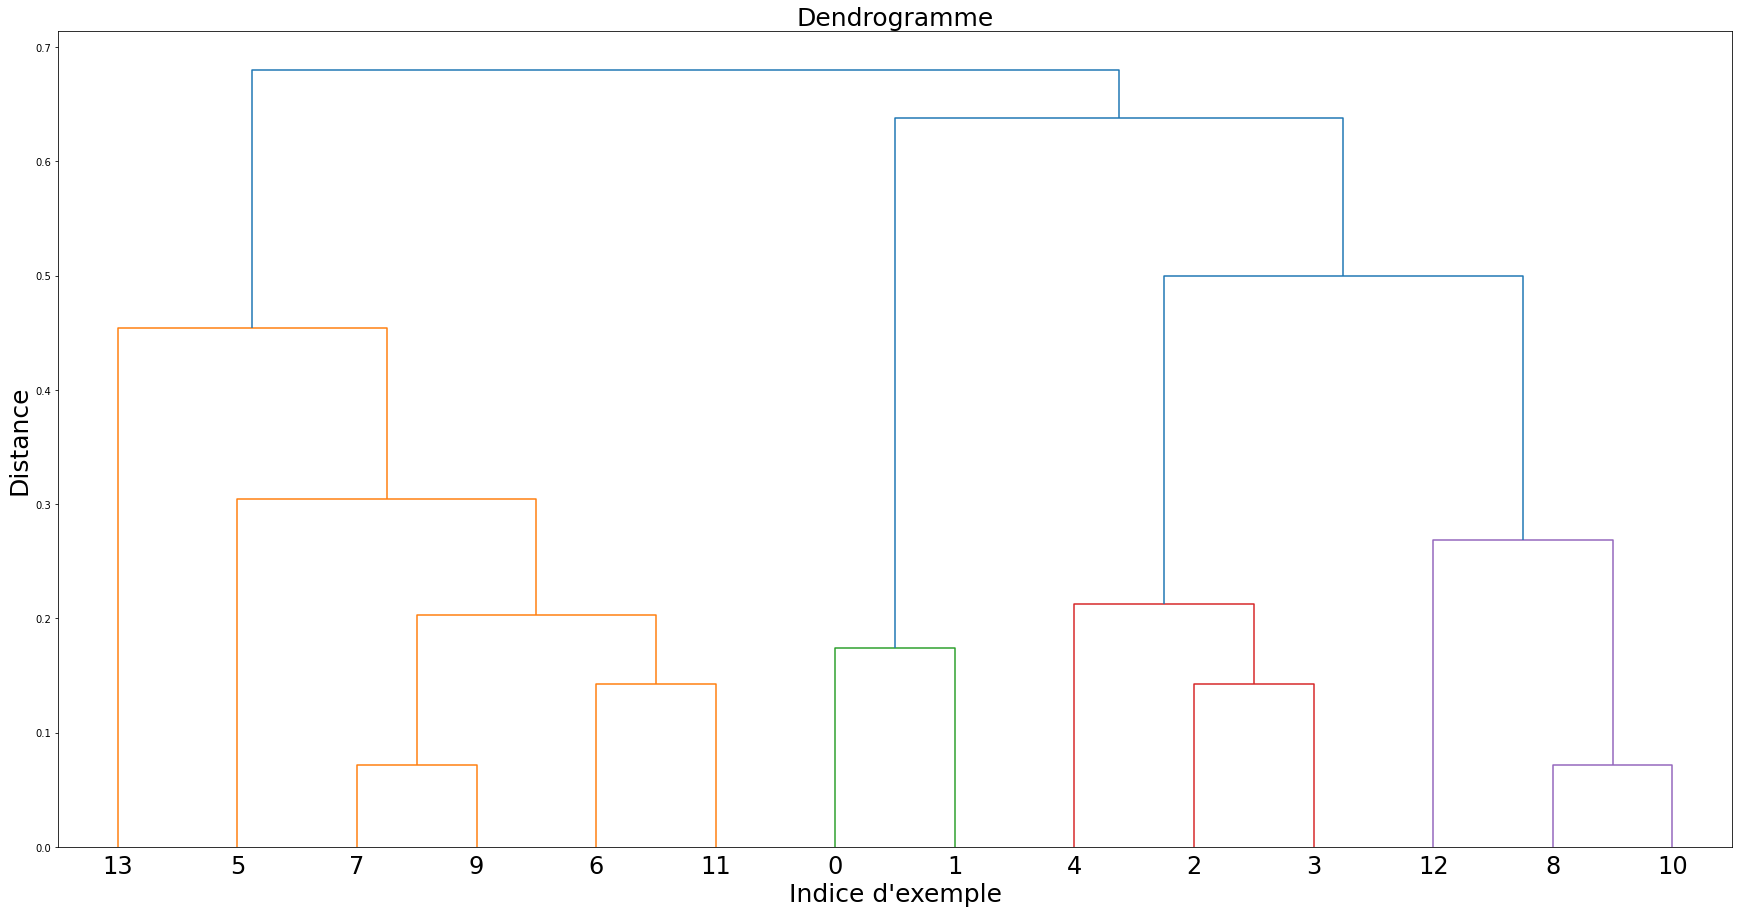

In [31]:
import scipy.cluster.hierarchy

# Paramètre de la fenêtre d'affichage: 
plt.figure(figsize=(30, 15)) # taille : largeur x hauteur
plt.title('Dendrogramme', fontsize=25)    
plt.xlabel("Indice d'exemple", fontsize=25)
plt.ylabel('Distance', fontsize=25)

# Construction du dendrogramme pour notre clustering :
scipy.cluster.hierarchy.dendrogram(
    clustering_hierarchique(data_2D_norm), 
    leaf_font_size=24.,  # taille des caractères de l'axe des X
)

# Affichage du résultat obtenu:
plt.show()

<font size="+1" color="RED"><b>[Q]</b></font>Modifier la fonction <code>clustering_hierarchique</code> en lui rajoutant deux arguments supplémentaires avec valeurs par défaut:
- `verbose=False` qui indique si un message doit être affiché lors de la fusion des clusters en donnant le nom des 2 éléments fusionnés et leur distance.
- `dendrogramme=False` pour indiquer si on souhaite ou pas l'affichage du dendrogramme résultat. Si c'est le cas, le dendrogramme sera donc afficher à l'issue de la fonction.

In [32]:
import scipy.cluster.hierarchy

def clustering_hierarchique(df, verbose=False, dendrogramme=False):
    partition = initialise(df)
    results = []
    for _ in range(len(df)):
        partition, k1, k2, dist = fusionne(df, partition, verbose=verbose)
        results.append([k1, k2, dist, len(partition[max(partition.keys())])])
    results = results[:-1]
    if dendrogramme:
        plt.figure(figsize=(30, 15))
        plt.title('Dendrogramme', fontsize=25)    
        plt.xlabel("Indice d'exemple", fontsize=25)
        plt.ylabel('Distance', fontsize=25)
        scipy.cluster.hierarchy.dendrogram(results, leaf_font_size=24.)
        plt.show()
    return results

In [33]:
clustering_hierarchique(data_2D_norm)

[[8, 10, 0.0714285714285714, 2],
 [7, 9, 0.07142857142857151, 2],
 [2, 3, 0.14285714285714285, 2],
 [6, 11, 0.1428571428571429, 2],
 [0, 1, 0.17437936593905287, 2],
 [15, 17, 0.20316375219039837, 4],
 [4, 16, 0.21237241067597867, 3],
 [12, 14, 0.26811891970176366, 3],
 [5, 19, 0.3047456282855976, 5],
 [13, 22, 0.4542857142857144, 6],
 [20, 21, 0.5000000000000001, 6],
 [18, 24, 0.638139657302555, 8],
 [23, 25, 0.6796842379114776, 14]]

Distance mininimale trouvée entre  [8, 10]  =  0.0714285714285714
Distance mininimale trouvée entre  [7, 9]  =  0.07142857142857151
Distance mininimale trouvée entre  [2, 3]  =  0.14285714285714285
Distance mininimale trouvée entre  [6, 11]  =  0.1428571428571429
Distance mininimale trouvée entre  [0, 1]  =  0.17437936593905287
Distance mininimale trouvée entre  [15, 17]  =  0.20316375219039837
Distance mininimale trouvée entre  [4, 16]  =  0.21237241067597867
Distance mininimale trouvée entre  [12, 14]  =  0.26811891970176366
Distance mininimale trouvée entre  [5, 19]  =  0.3047456282855976
Distance mininimale trouvée entre  [13, 22]  =  0.4542857142857144
Distance mininimale trouvée entre  [20, 21]  =  0.5000000000000001
Distance mininimale trouvée entre  [18, 24]  =  0.638139657302555
Distance mininimale trouvée entre  [23, 25]  =  0.6796842379114776


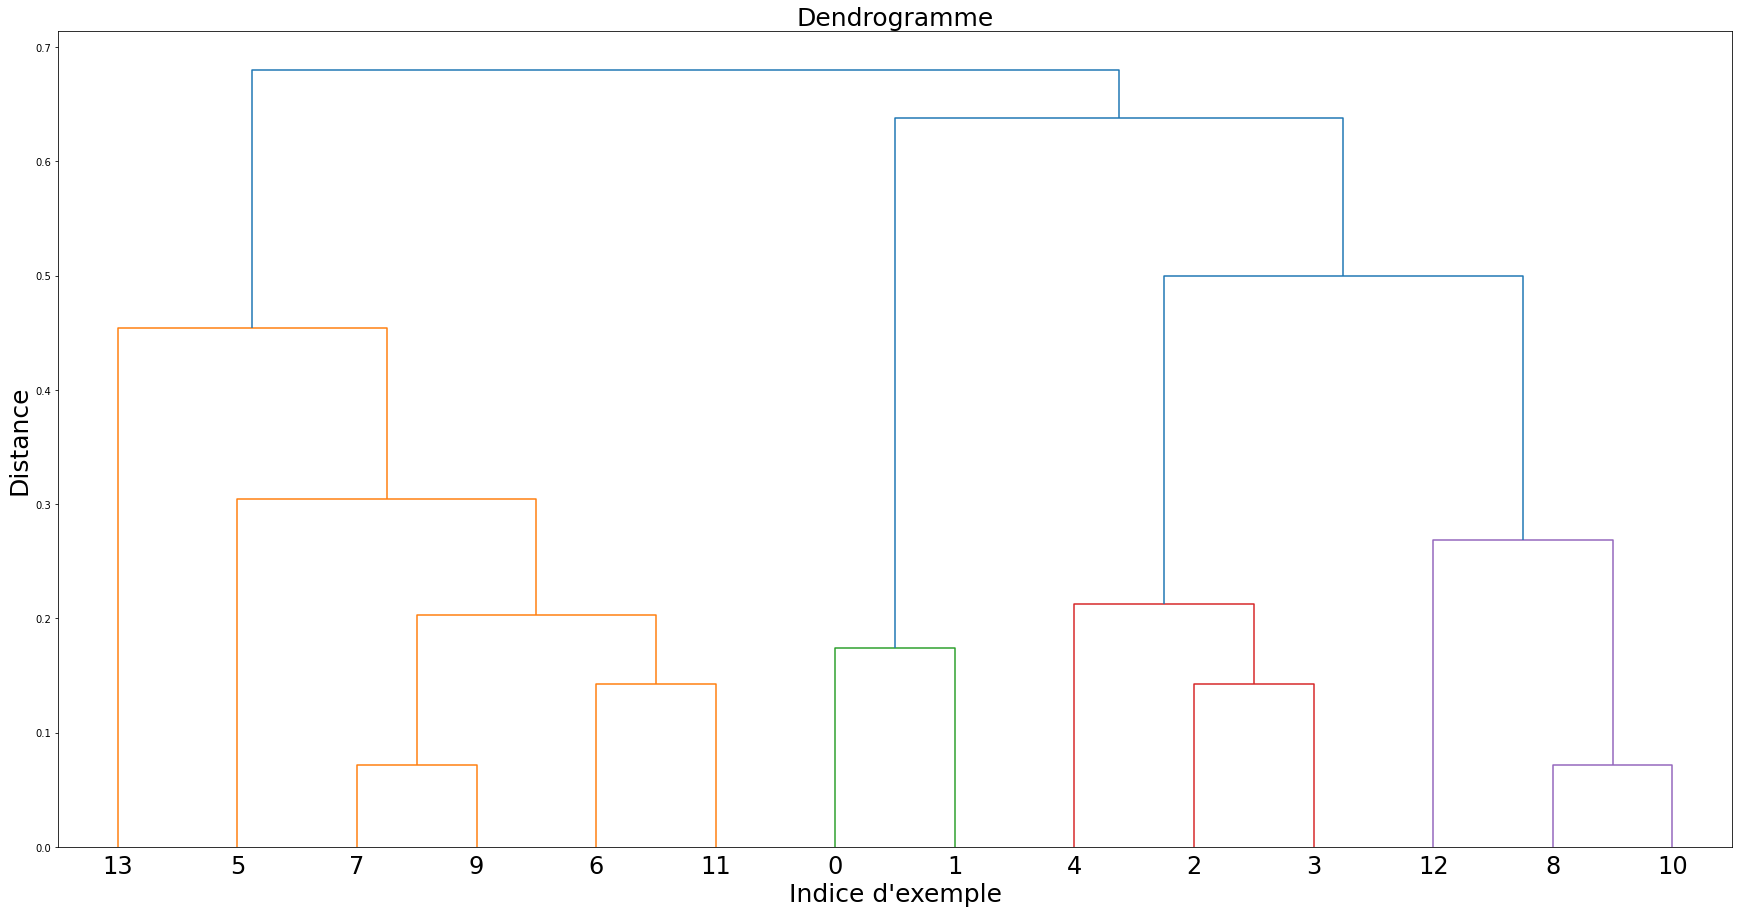

[[8, 10, 0.0714285714285714, 2],
 [7, 9, 0.07142857142857151, 2],
 [2, 3, 0.14285714285714285, 2],
 [6, 11, 0.1428571428571429, 2],
 [0, 1, 0.17437936593905287, 2],
 [15, 17, 0.20316375219039837, 4],
 [4, 16, 0.21237241067597867, 3],
 [12, 14, 0.26811891970176366, 3],
 [5, 19, 0.3047456282855976, 5],
 [13, 22, 0.4542857142857144, 6],
 [20, 21, 0.5000000000000001, 6],
 [18, 24, 0.638139657302555, 8],
 [23, 25, 0.6796842379114776, 14]]

In [34]:
clustering_hierarchique(data_2D_norm,verbose=True,dendrogramme=True)

## Variantes : complete linkage, simple linkage, average linkage

<font size="+1" color="RED"><b>[Q]</b></font> Ecrire 3 nouvelles fonctions `clustering_hierarchique_complete`, `clustering_hierarchique_simplee` et `clustering_hierarchique_average` qui implémentent le clustering hiérarchique basé le linkage correspondant.


Puis afficher et comparer les dendrogrammes obtenus par les 4 approches de clustering implémentées.

<div style='background-color:lightblue; padding:10px 10px 10px 10px;'>
Ecrivons la fonction `dist_linkage_clusters` qui prend en paramètre un type de linkage, un nom de distance à utiliser et deux clusters et retourne la distance au sens du linkage.

- `Complete linkage` : distance maximale
- `Simple linkage`: distance minimale
- `Average linkage` : distance moyenne

Nous allons utiliser `scipy.spatial.distance` pour nos calculs de distances.</div>

In [35]:
from scipy.spatial.distance import cdist

In [36]:
def dist_linkage_clusters(linkage, dist_func, arr1, arr2):
    r = cdist(arr1, arr2, dist_func)
    if linkage == 'complete':
        return np.max(r)
    if linkage == 'simple':
        return np.min(r)
    if linkage == 'average':
        return np.mean(r)

<div style='background-color:lightblue; padding:10px 10px 10px 10px;'>
Ecrivons la fonction `fusionne_linkage` qui prend en paramètre un type de linkage, un dataframe ou un array et une partition initiale, et renvoie une fusion en tenant compte du type de linkage.</div>

In [37]:
def fusionne_linkage(linkage, df, in_partition, dist_func='euclidean', verbose=False):
    dist_min = +np.inf
    k1_min, k2_min = -1, -1
    for k1, v1 in in_partition.items():
        for k2, v2 in in_partition.items():
            if k1 == k2:
                continue
            dist = dist_linkage_clusters(linkage, dist_func, df.iloc[v1], df.iloc[v2])
            if dist < dist_min:
                dist_min = dist
                k1_min, k2_min = k1, k2
    out_partition = dict(in_partition)
    if k1_min != -1:
        del out_partition[k1_min]
        del out_partition[k2_min]
        out_partition[max(in_partition)+1] = [*in_partition[k1_min], *in_partition[k2_min]]
    if verbose:
        print(f'Distance mininimale trouvée entre  [{k1_min}, {k2_min}]  =  {dist_min}')
    return out_partition, k1_min, k2_min, dist_min

<div style='background-color:lightblue; padding:10px 10px 10px 10px;'>
Ecrivons les fonctions suivantes :

- `clustering_hierarchique_linkage`: qui prend en paramètres un nom de linkage, des données, une fonction de distance, ...
- `clustering_hierarchique_complete`: la version avec complete linkage
- `clustering_hierarchique_simplee`: la version avec simple linkage
- `clustering_hierarchique_average`: la version avec average linkage
</div>

In [38]:
def clustering_hierarchique_linkage(linkage, df, dist_func='euclidean', 
                                    verbose=False, dendrogramme=False):
    partition = initialise(df)
    results = []
    for _ in range(len(df)):
        partition, k1, k2, dist = fusionne_linkage(linkage, df, partition, 
                                                   dist_func, verbose)
        results.append([k1, k2, dist, len(partition[max(partition.keys())])])
    results = results[:-1]
    if dendrogramme:
        plt.figure(figsize=(30, 15))
        plt.title('Dendrogramme', fontsize=25)    
        plt.xlabel("Indice d'exemple", fontsize=25)
        plt.ylabel('Distance', fontsize=25)
        scipy.cluster.hierarchy.dendrogram(results, leaf_font_size=24.)
        plt.show()
    return results

In [39]:
def clustering_hierarchique_complete(df, dist_func='euclidean', 
                                    verbose=False, dendrogramme=False):
    return clustering_hierarchique_linkage('complete', df, dist_func,
                                          verbose, dendrogramme)

In [40]:
def clustering_hierarchique_simplee(df, dist_func='euclidean', 
                                    verbose=False, dendrogramme=False):
    return clustering_hierarchique_linkage('simple', df, dist_func,
                                          verbose, dendrogramme)

In [41]:
def clustering_hierarchique_average(df, dist_func='euclidean', 
                                    verbose=False, dendrogramme=False):
    return clustering_hierarchique_linkage('average', df, dist_func,
                                          verbose, dendrogramme)

<div style='background-color:lightblue; padding:10px 10px 10px 10px;'>Expérimentations</div>

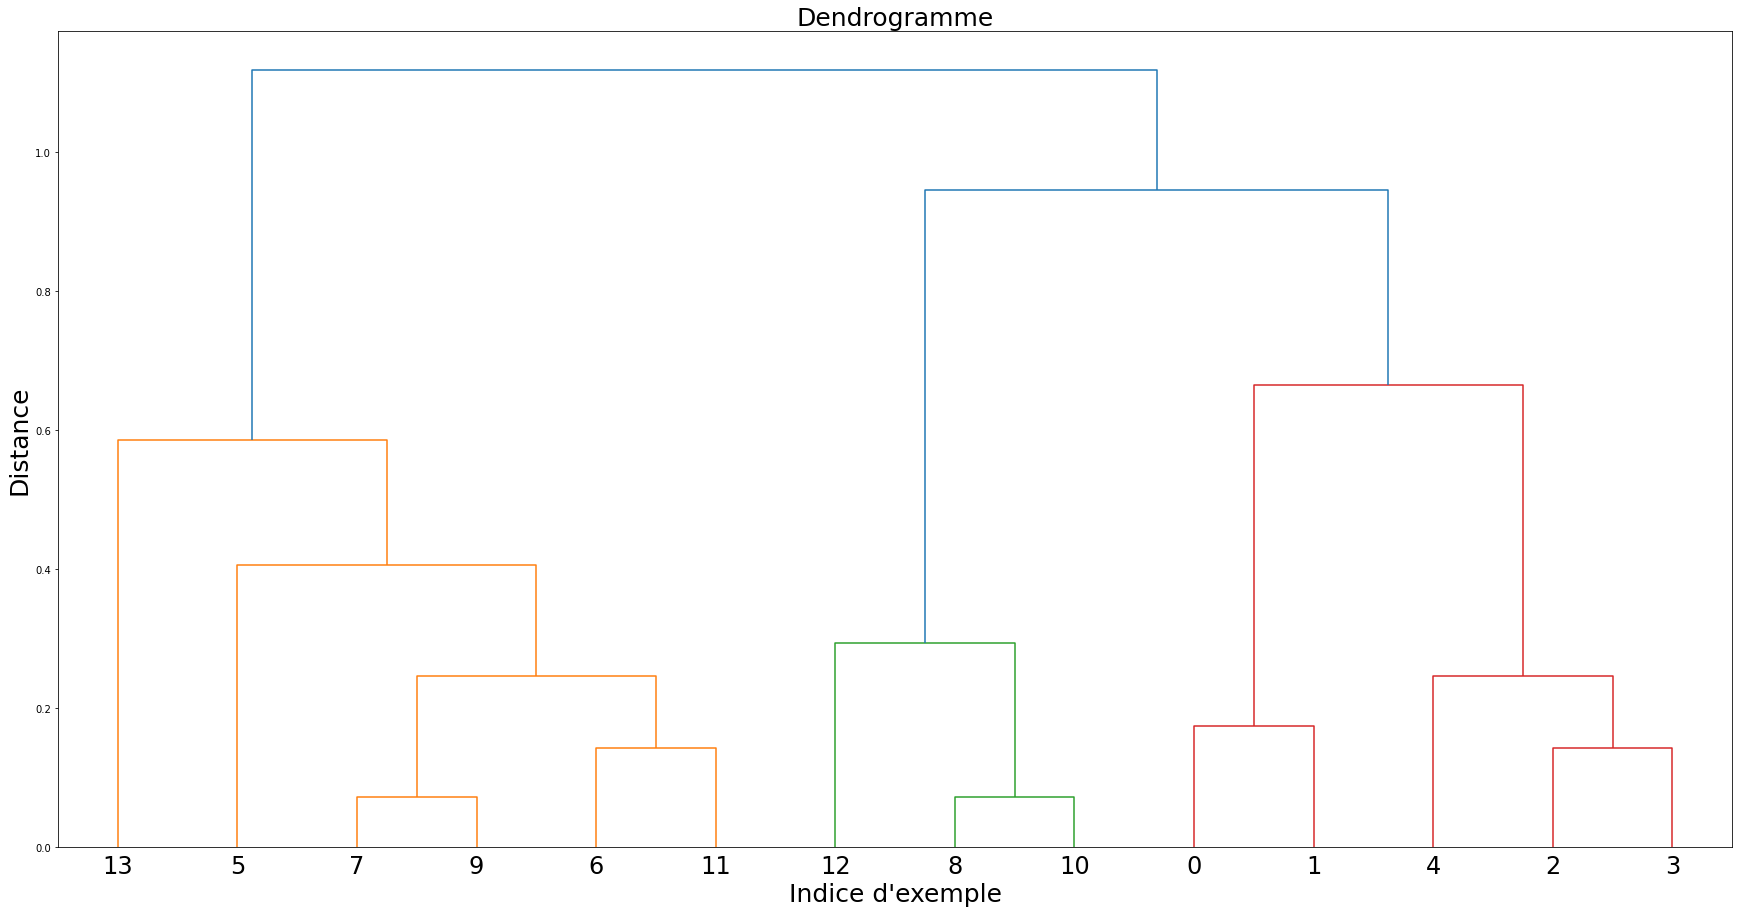

[[8, 10, 0.0714285714285714, 2],
 [7, 9, 0.07142857142857151, 2],
 [2, 3, 0.14285714285714285, 2],
 [6, 11, 0.1428571428571429, 2],
 [0, 1, 0.17437936593905287, 2],
 [15, 17, 0.2457807219155036, 4],
 [4, 16, 0.24578072191550362, 3],
 [12, 14, 0.2931183504097598, 3],
 [5, 19, 0.40632750438079696, 5],
 [13, 22, 0.5862367008195198, 6],
 [18, 20, 0.6645544771207432, 5],
 [21, 24, 0.945882591842677, 8],
 [23, 25, 1.118033988749895, 14]]

In [42]:
clustering_hierarchique_complete(data_2D_norm, dendrogramme=True)

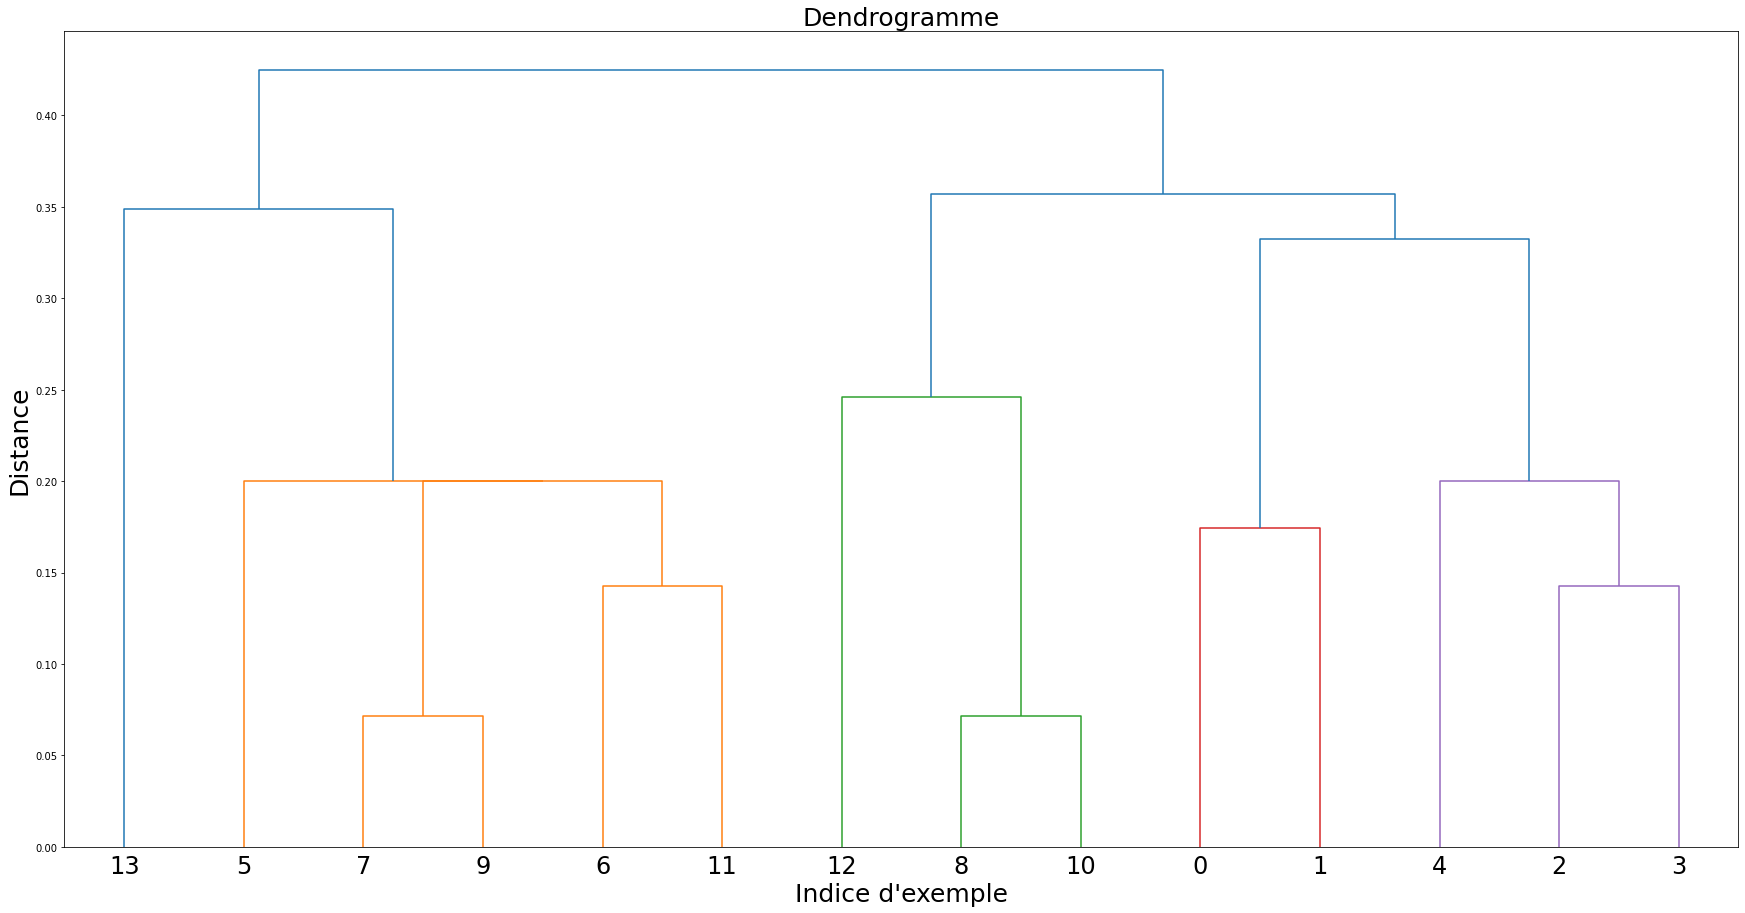

[[8, 10, 0.0714285714285714, 2],
 [7, 9, 0.07142857142857151, 2],
 [2, 3, 0.14285714285714285, 2],
 [6, 11, 0.1428571428571429, 2],
 [0, 1, 0.17437936593905287, 2],
 [15, 17, 0.19999999999999996, 4],
 [4, 16, 0.2, 3],
 [5, 19, 0.20000000000000007, 5],
 [12, 14, 0.2457807219155036, 3],
 [18, 20, 0.3322772385603716, 5],
 [13, 21, 0.3487587318781058, 6],
 [22, 23, 0.3571428571428572, 8],
 [24, 25, 0.4247448213519573, 14]]

In [43]:
clustering_hierarchique_simplee(data_2D_norm, dendrogramme=True)

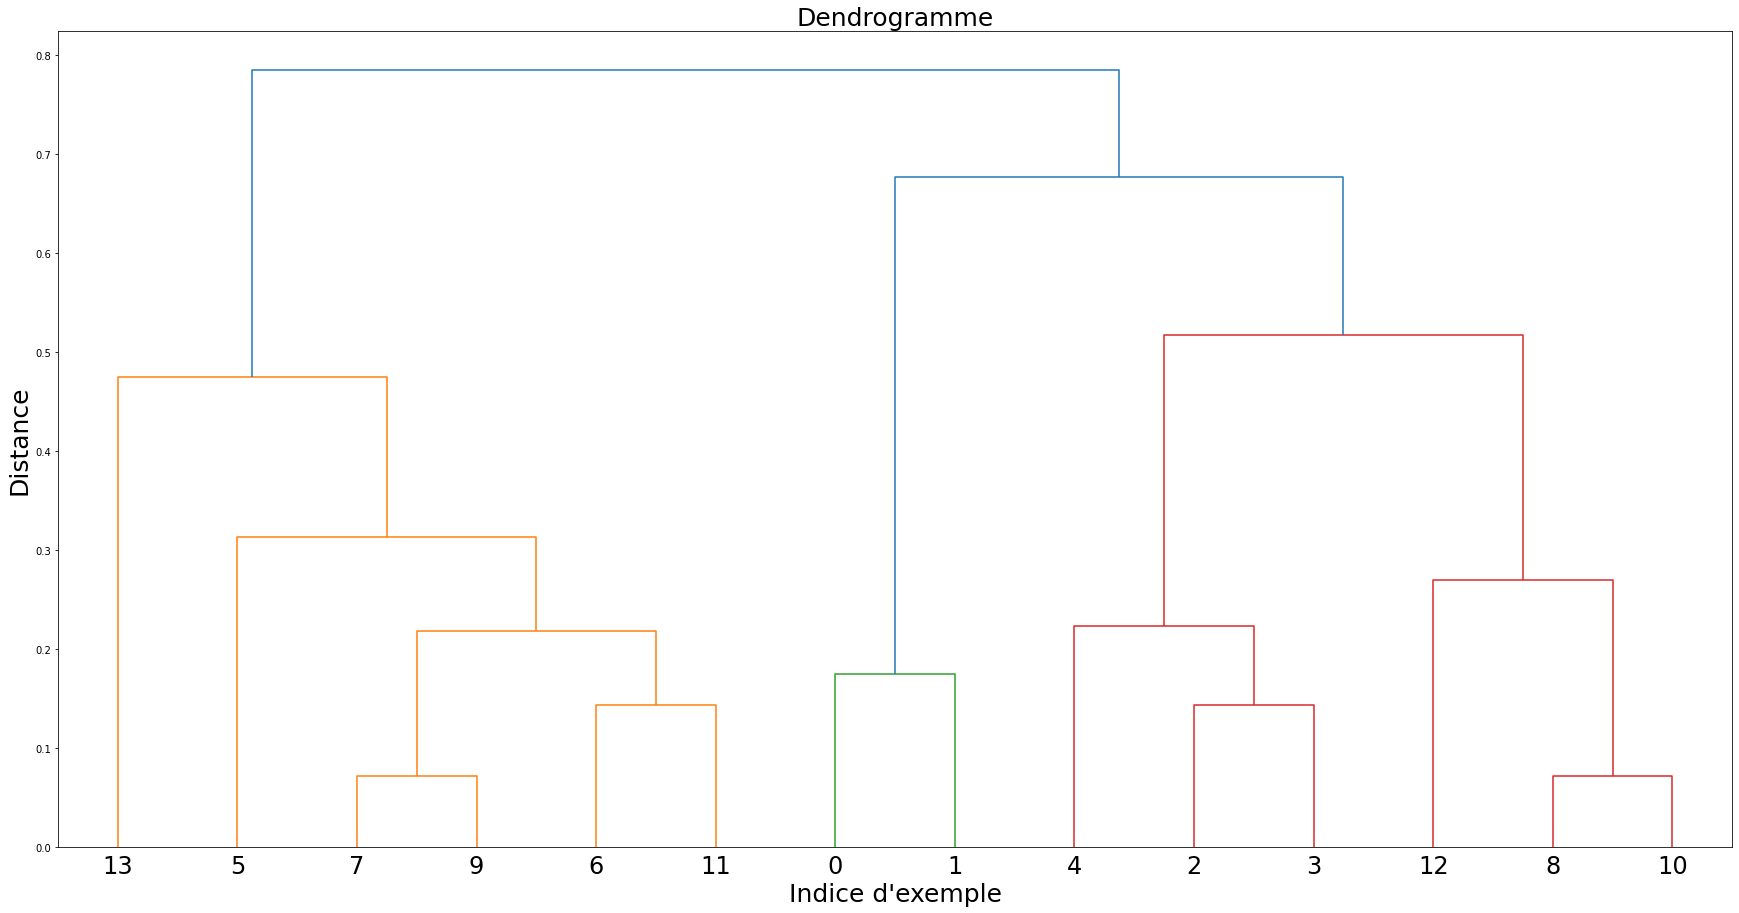

[[8, 10, 0.0714285714285714, 2],
 [7, 9, 0.07142857142857151, 2],
 [2, 3, 0.14285714285714285, 2],
 [6, 11, 0.1428571428571429, 2],
 [0, 1, 0.17437936593905287, 2],
 [15, 17, 0.2176313858168652, 4],
 [4, 16, 0.22289036095775183, 3],
 [12, 14, 0.2694495361626317, 3],
 [5, 19, 0.31302705657407515, 5],
 [13, 22, 0.4745491993187841, 6],
 [20, 21, 0.5175575371779451, 6],
 [18, 24, 0.6770324690297006, 8],
 [23, 25, 0.784963189028133, 14]]

In [44]:
clustering_hierarchique_average(data_2D_norm, dendrogramme=True)

## Ajout des fonctions dans la librairie `iads`

<font size="+1" color="RED"><b>[Q]</b></font> Ajouter les fonctions de clustering dans votre librairie `iads`. Pour cela, créer un nouveau fichier de nom `Clustering.py` dans votre répertoire `iads`. 
Utiliser les premières lignes du fichier `Classifiers.py` pour débuter votre fichier `Clustering.py`, puis rajouter dans ce fichier les fonctions de clustering hiérarchique (tous linkages) de ce notebook, ainsi que les fonctions qu'elles utilisent.

## Phase 2 : application à des données réelles

### Données: traitement des déchets de la ville de Paris

Récupérer les données concernant le traitement des déchets de la ville de Paris :
http://opendata.paris.fr/explore/dataset/tonnages_des_dechets_bacs_jaunes/table/

**Attention**: il faut préparer cette base afin de pouvoir appliquer l'algorithme de clustering: en particulier, certaines colonnes (Granularité, Total...) ne sont pas à utilisables dans le calcul des distances, il faut donc les éliminer. Il faut aussi prévoir de conserver le nom de l'arrondissement afin de pouvoir à la fin analyser le résultat du clustering.

Sauvegarder ces données, prêtes à être traitées par l'algorithme de clustering, au format CSV dans le répertoire <pre>data/</pre> sous le nom <pre>base-Paris.csv</pre>

<font size="+1" color="RED"><b>[Q]</b></font> Etudier cette base et les clusters qui peuvent être mis en évidence.


In [45]:
data_Paris = pd.read_csv('data/base-Paris.csv')

In [46]:
data_Paris.head(-1)

,Granularité,janv-11,févr-11,mars-11,avr-11,mai-11,juin-11,juil-11,août-11,sept-11,oct-11,nov-11,déc-11,Total arrondissement 2011
0,75007,288.1,249.1,303.7,255.8,287.8,288.4,249.6,185.6,281.3,284.3,296.4,301.1,NaN
1,75013,596.5,540.2,618.5,558.6,595.9,581.7,539.2,490.5,597.8,575.7,580.5,601.4,NaN
2,75014,464,404.9,465.3,420.2,405.3,446,412.9,348.7,449.3,446.3,453.1,484.3,NaN
3,75015,903.1,801.4,937.5,835.5,876.8,888.6,628.8,674.8,913.3,878.7,895.7,935.8,NaN
4,75017,451.1,412.4,491.6,422.7,363.6,446.4,409.5,332.3,416.4,451.5,475.1,513.5,NaN
5,75018,427,394.3,455.2,419.9,458.3,456.6,418,361.8,464.6,453.4,478.5,470.9,NaN
6,75019,323.4,287.3,350.3,317.8,336.9,340.7,311.6,281,345.6,335.6,367,354.5,NaN
7,75002,153,125.8,136.6,126.6,133.2,127.6,126.7,114.3,144.3,145.1,129.5,129.8,NaN
8,75004,116.3,115.7,133.4,115,123.2,120.5,114.5,97.6,130.5,123,124.3,133.7,NaN
9,75008,252.6,246.7,252.9,232.5,199.4,236.4,175.4,189.4,266.6,230.3,257.7,224.4,NaN


<font size="+1" color="RED"><b>[Q]</b></font> Préparer un rapport d'analyse (c'est-à-dire, compléter votre notebook en rajoutant à la suite tout un ensemble d'expérimentations et de résultats obtenus sur la base) réalisé sur cette base qui mette en évidence les clusters existants à différents niveaux de distance, et en utilisant différentes distances.


<div style='background-color: lightblue; padding: 10px 10px 10px 10px;'>
    Commençons par éliminer les colonnes non pertinentes au clustering.
</div>

In [70]:
data_Paris_clus = data_Paris.copy()
data_Paris_clus['Granularité']

0          75007
1          75013
2          75014
3          75015
4          75017
5          75018
6          75019
7          75002
8          75004
9          75008
10         75012
11         75016
12         75020
13    Tout Paris
14         75001
15         75005
16         75006
17         75010
18         75011
19         75003
20         75009
Name: Granularité, dtype: object

In [72]:
data_Paris_clus = data_Paris_clus.drop(labels=13, axis=0)
data_Paris_clus['Granularité']

0     75007
1     75013
2     75014
3     75015
4     75017
5     75018
6     75019
7     75002
8     75004
9     75008
10    75012
11    75016
12    75020
14    75001
15    75005
16    75006
17    75010
18    75011
19    75003
20    75009
Name: Granularité, dtype: object

In [73]:
del data_Paris_clus['Granularité']
del data_Paris_clus['Total arrondissement 2011']
print(data_Paris_clus.columns)

Index(['janv-11', 'févr-11', 'mars-11', 'avr-11', 'mai-11', 'juin-11',
       'juil-11', 'août-11', 'sept-11', 'oct-11', 'nov-11', 'déc-11'],
      dtype='object')


<div style='background-color: lightblue; padding: 10px 10px 10px 10px;'>
    Convertissons et normalisons les données.
</div>

In [75]:
data_Paris_norm = np.array(data_Paris_clus).reshape((-1,))
for i in range(len(data_Paris_norm)):
    data_Paris_norm[i] = float(data_Paris_norm[i].replace(' ', ''))
data_Paris_norm = np.array(data_Paris_norm, dtype=float).reshape((len(data_Paris_clus), -1))
data_Paris_norm = pd.DataFrame(data_Paris_norm, columns=data_Paris_clus.columns)
data_Paris_norm = normalisation(data_Paris_norm)

<div style='background-color: lightblue; padding: 10px 10px 10px 10px;'>
    Testons les différentes méthodes de clusterings en utilisant différentes métriques de distances.
</div>

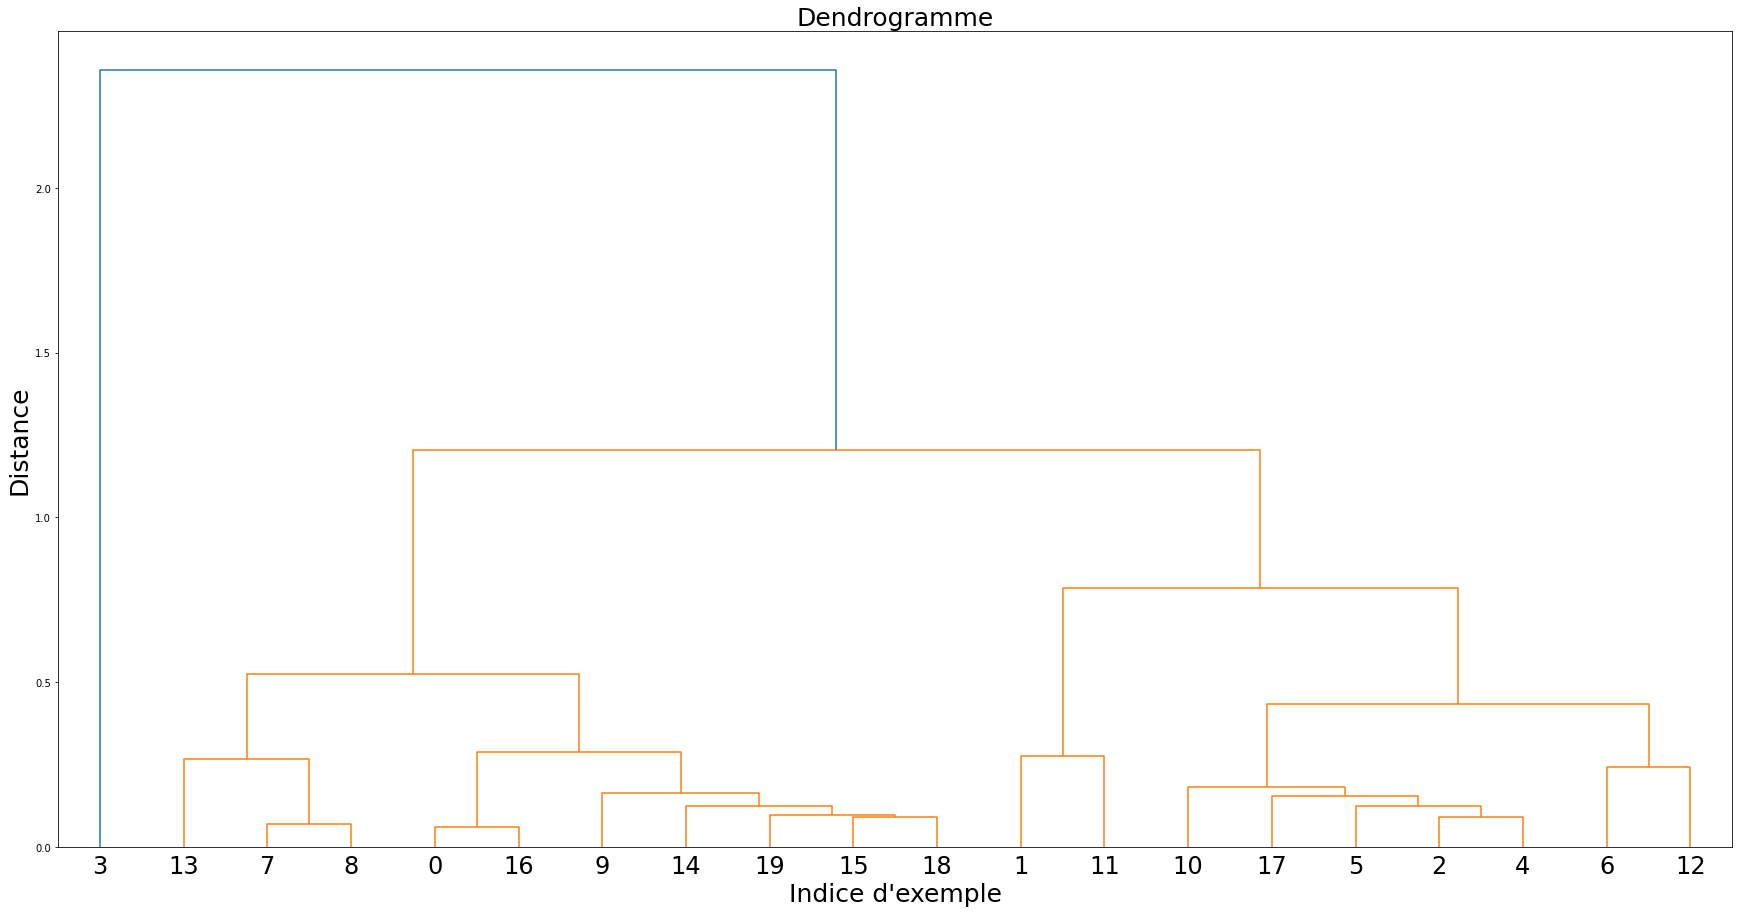

[[0, 16, 0.05980330904516489, 2],
 [7, 8, 0.0699559695681218, 2],
 [2, 4, 0.09034538002040293, 2],
 [15, 18, 0.09099688490823389, 2],
 [19, 23, 0.09608457631845164, 3],
 [5, 22, 0.12348584942545547, 3],
 [14, 24, 0.12453407045196078, 4],
 [17, 25, 0.1553231849516947, 4],
 [9, 26, 0.16357044635684204, 5],
 [10, 27, 0.1812139091958864, 5],
 [6, 12, 0.24168540846465467, 2],
 [13, 21, 0.26550417696685485, 3],
 [1, 11, 0.2757063809341908, 2],
 [20, 28, 0.2890866853003415, 7],
 [29, 30, 0.4321158905664246, 7],
 [31, 33, 0.5247503537641786, 10],
 [32, 34, 0.7861301125077123, 9],
 [35, 36, 1.2057059027244827, 19],
 [3, 37, 2.357153341249612, 20]]

In [76]:
clustering_hierarchique(data_Paris_norm, dendrogramme=True)

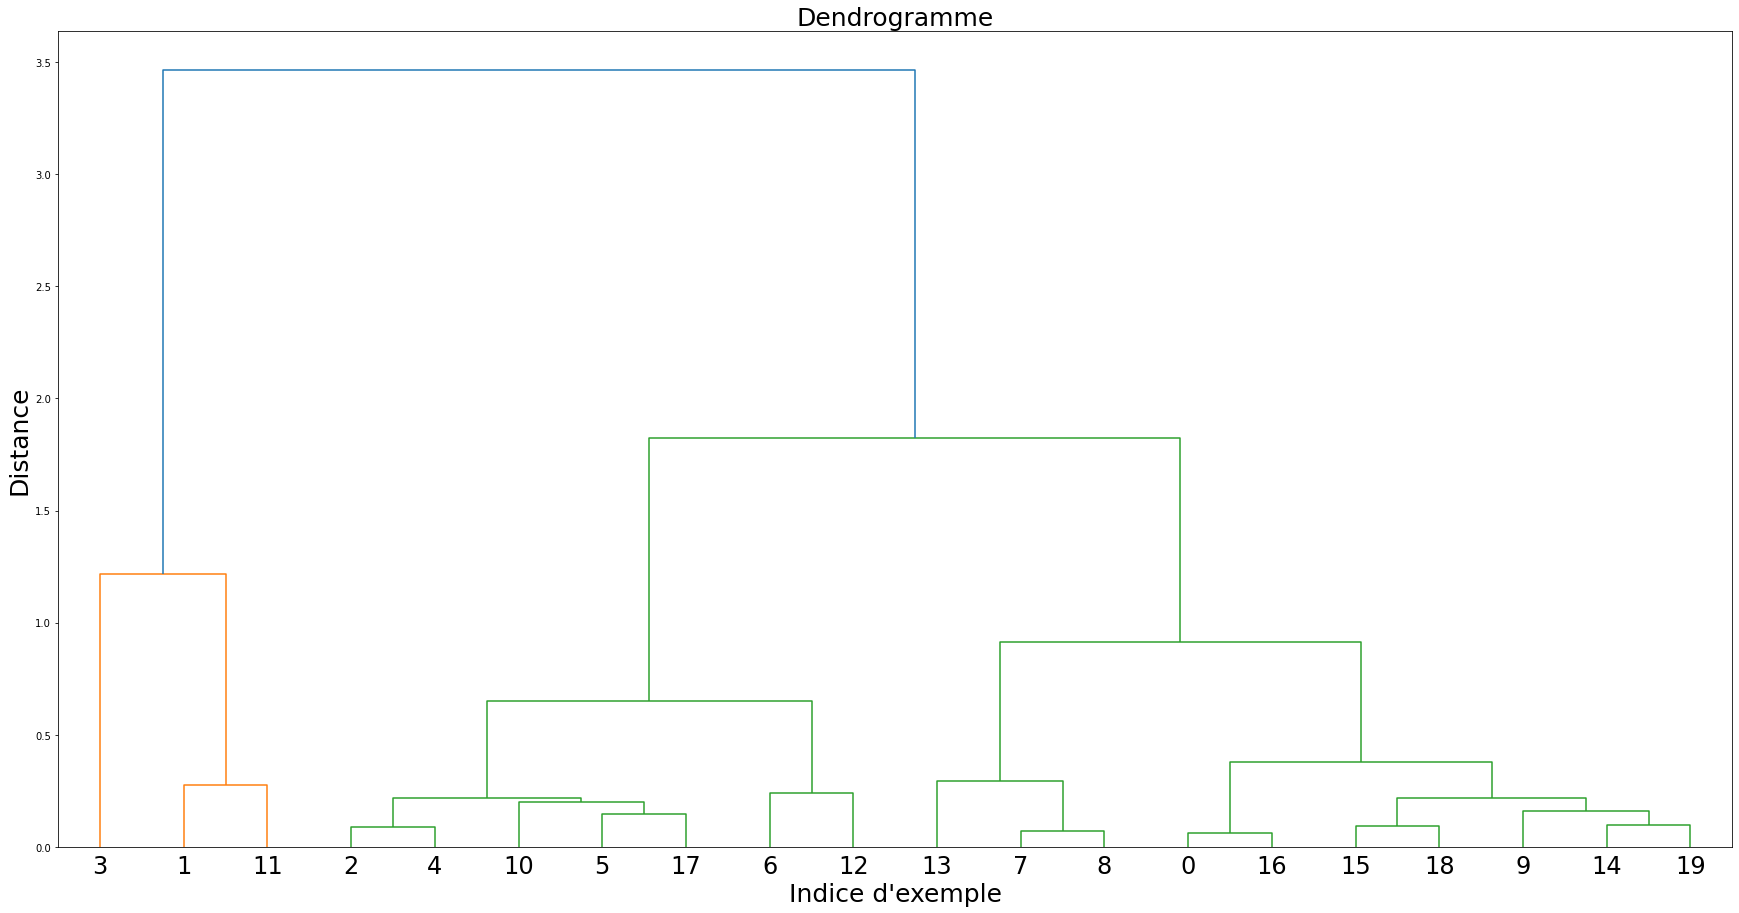

[[0, 16, 0.05980330904516489, 2],
 [7, 8, 0.06995596956812182, 2],
 [2, 4, 0.09034538002040293, 2],
 [15, 18, 0.09099688490823389, 2],
 [14, 19, 0.09818154292330362, 2],
 [5, 17, 0.14588555433594885, 2],
 [9, 24, 0.16088812240051226, 3],
 [10, 25, 0.19956051562208726, 3],
 [22, 27, 0.21873669355625952, 5],
 [23, 26, 0.2192318254370334, 5],
 [6, 12, 0.24168540846465464, 2],
 [1, 11, 0.2757063809341908, 2],
 [13, 21, 0.294555978772269, 3],
 [20, 29, 0.37996811342190495, 7],
 [28, 30, 0.6520458836797397, 7],
 [32, 33, 0.9147339159658285, 10],
 [3, 31, 1.2174824146179026, 3],
 [34, 35, 1.8216805757605725, 17],
 [36, 37, 3.4641016151377544, 20]]

In [77]:
clustering_hierarchique_complete(data_Paris_norm, dendrogramme=True)

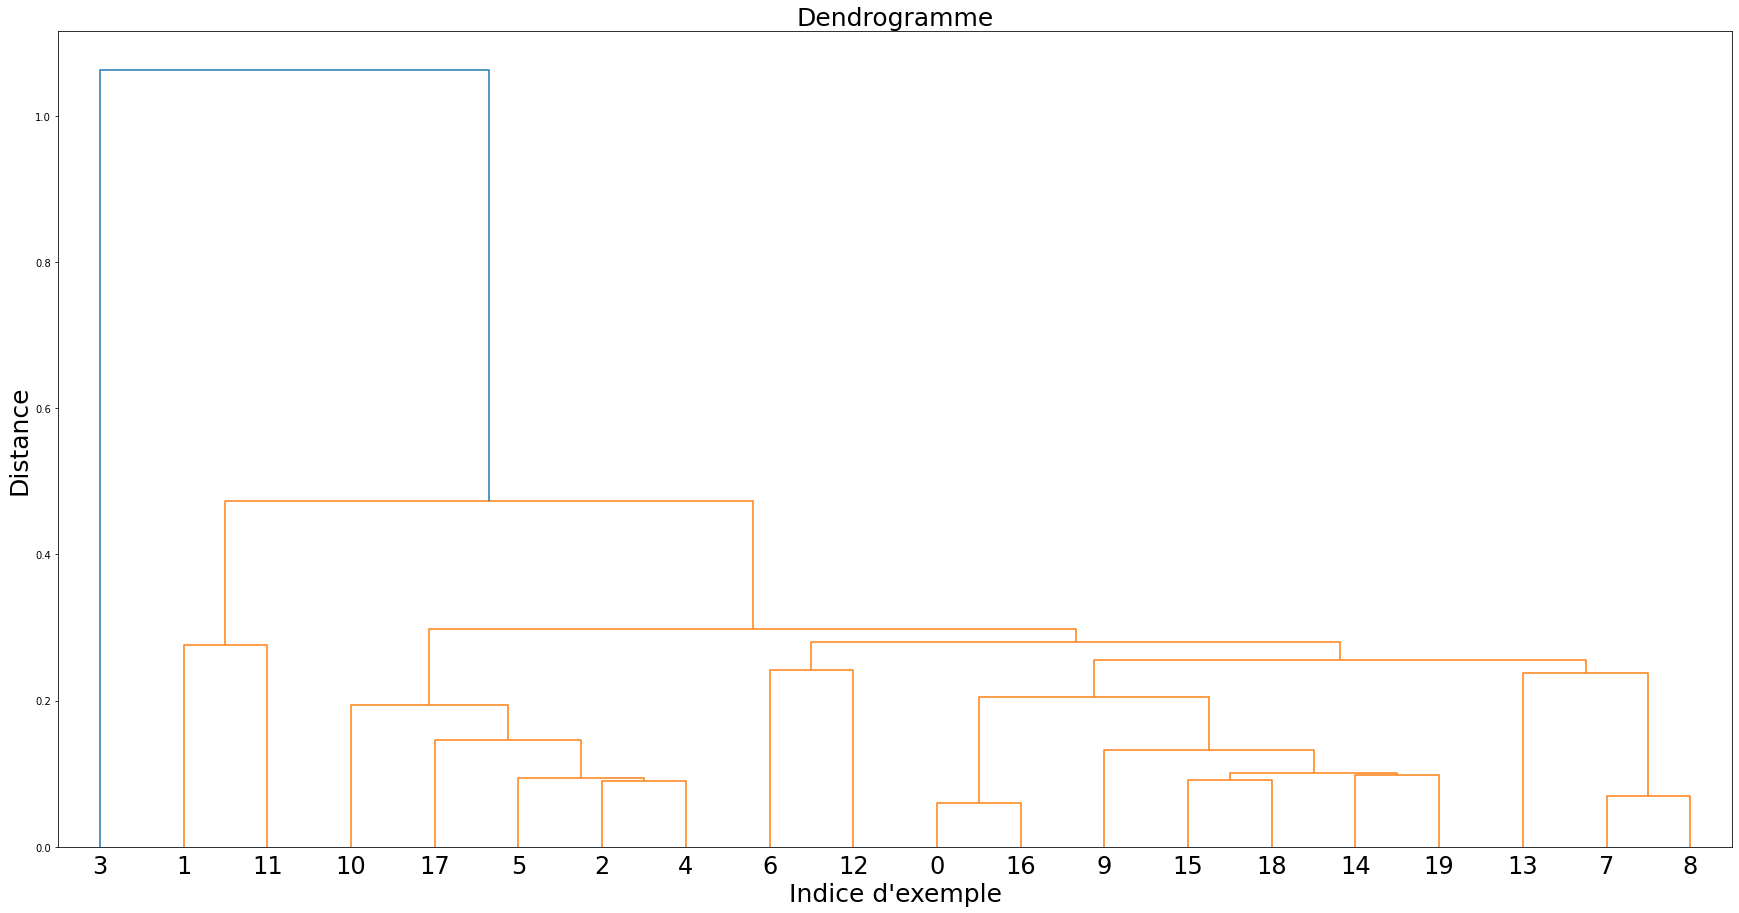

[[0, 16, 0.05980330904516489, 2],
 [7, 8, 0.06995596956812182, 2],
 [2, 4, 0.09034538002040293, 2],
 [15, 18, 0.09099688490823389, 2],
 [5, 22, 0.09479475647793836, 3],
 [14, 19, 0.09818154292330362, 2],
 [23, 25, 0.10081546857637981, 4],
 [9, 26, 0.13242234898140426, 5],
 [17, 24, 0.14588555433594885, 4],
 [10, 28, 0.1943305954741654, 5],
 [20, 27, 0.2050855909122427, 7],
 [13, 21, 0.2380517384568165, 3],
 [6, 12, 0.24168540846465464, 2],
 [30, 31, 0.25489481925527674, 10],
 [1, 11, 0.2757063809341908, 2],
 [32, 33, 0.2797887794973045, 12],
 [29, 35, 0.2974519174515183, 17],
 [34, 36, 0.4732632387615004, 19],
 [3, 37, 1.06248912283028, 20]]

In [78]:
clustering_hierarchique_simplee(data_Paris_norm, dendrogramme=True)

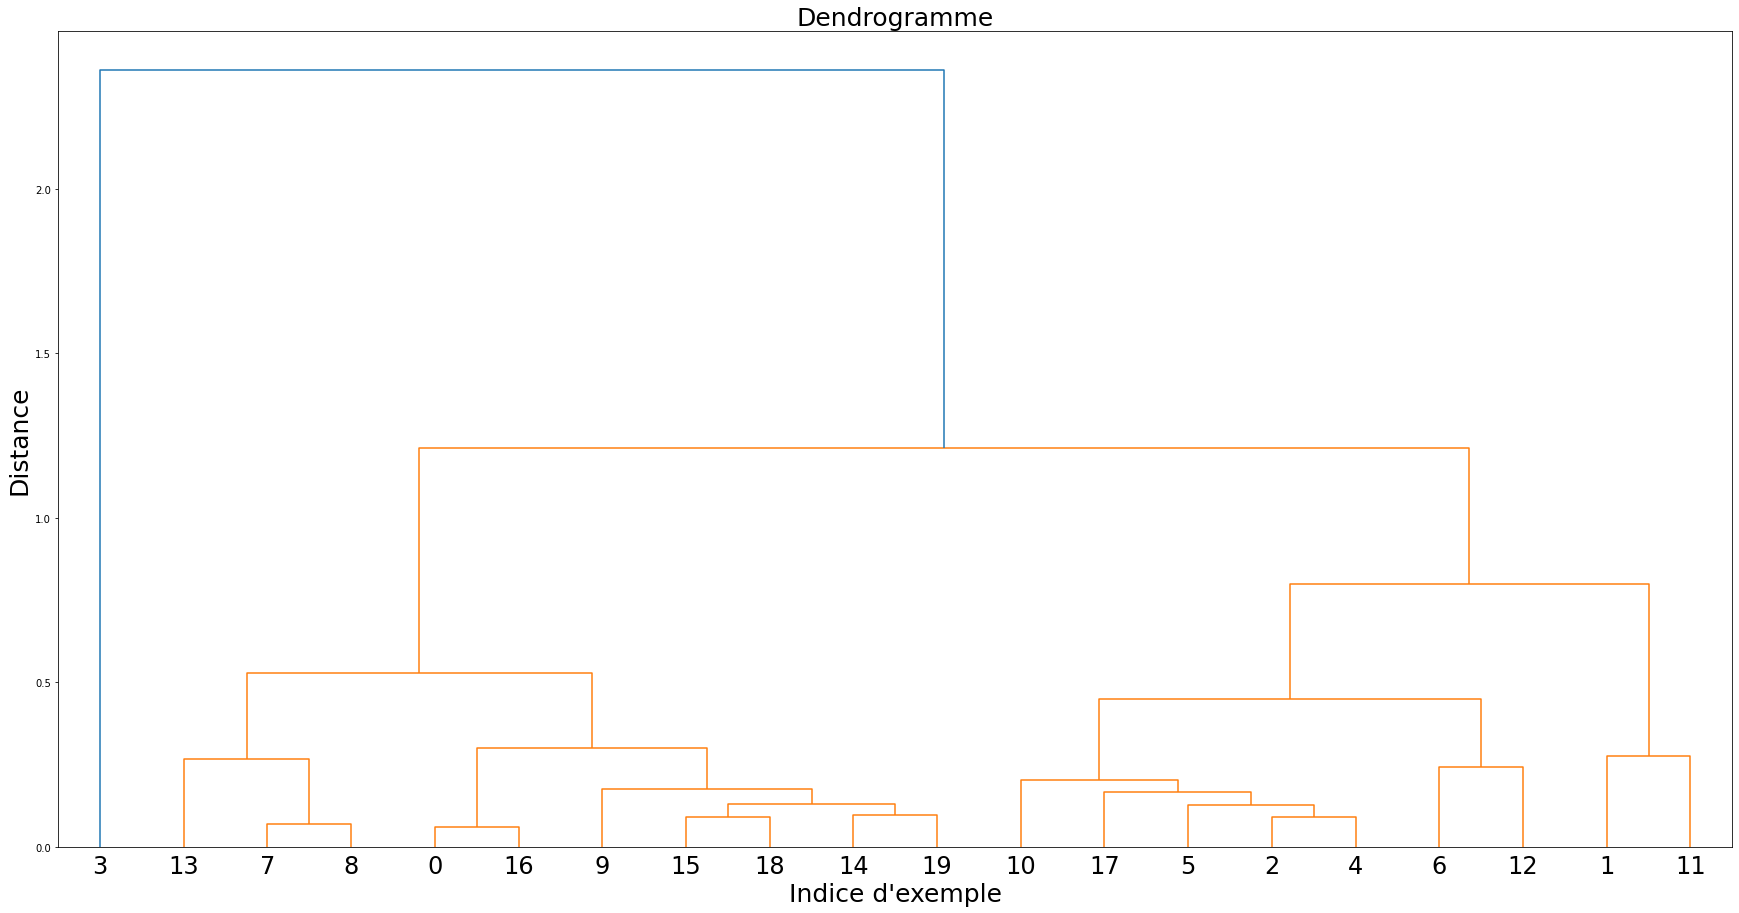

[[0, 16, 0.05980330904516489, 2],
 [7, 8, 0.06995596956812182, 2],
 [2, 4, 0.09034538002040293, 2],
 [15, 18, 0.09099688490823389, 2],
 [14, 19, 0.09818154292330362, 2],
 [5, 22, 0.12738582741517274, 3],
 [23, 24, 0.12946815209263535, 4],
 [17, 25, 0.16780348491242672, 4],
 [9, 26, 0.17652494678428082, 5],
 [10, 27, 0.20205758514354327, 5],
 [6, 12, 0.24168540846465464, 2],
 [13, 21, 0.26630385861454275, 3],
 [1, 11, 0.2757063809341908, 2],
 [20, 28, 0.29903837696397984, 7],
 [29, 30, 0.4494535894504471, 7],
 [31, 33, 0.5293312799971565, 10],
 [34, 32, 0.7990290001444559, 9],
 [35, 36, 1.2115868538398995, 19],
 [3, 37, 2.3610331531652573, 20]]

In [79]:
clustering_hierarchique_average(data_Paris_norm, dendrogramme=True)

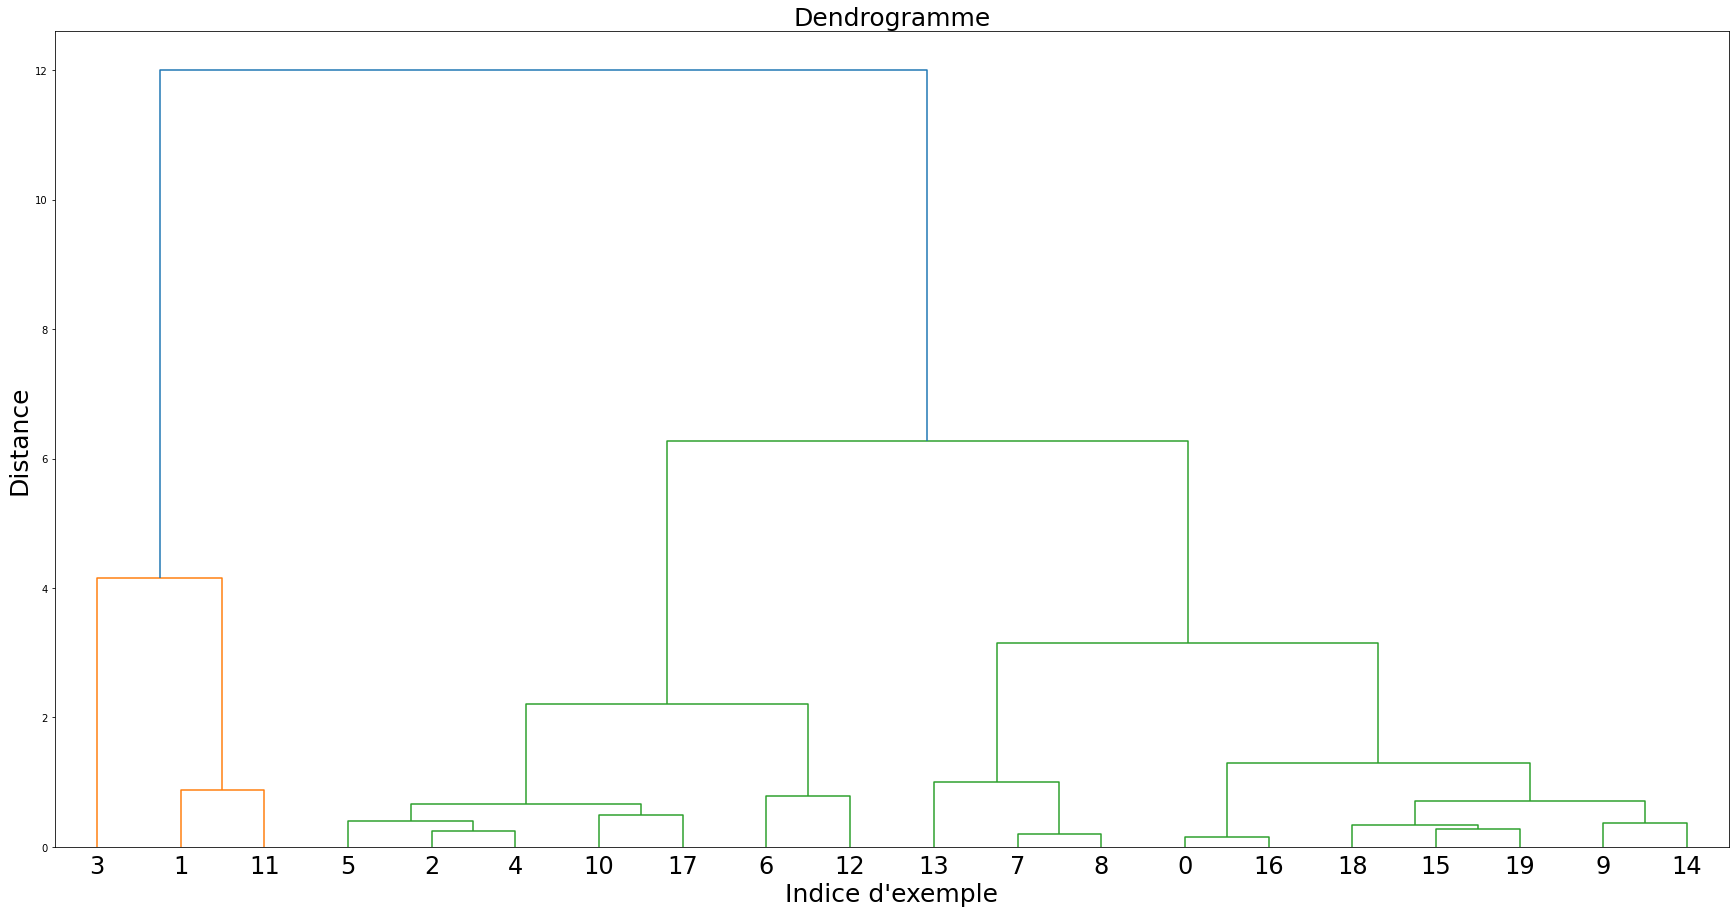

[[0, 16, 0.15514121759420235, 2],
 [7, 8, 0.20094298606115393, 2],
 [2, 4, 0.25052643145105596, 2],
 [15, 19, 0.2736357638772213, 2],
 [18, 23, 0.3435302070287627, 3],
 [9, 14, 0.36387711439638054, 2],
 [5, 22, 0.40591689538085823, 3],
 [10, 17, 0.4890437519807471, 2],
 [26, 27, 0.6578937367868589, 5],
 [24, 25, 0.7014878565612365, 5],
 [6, 12, 0.7842824910764548, 2],
 [1, 11, 0.8772540810839015, 2],
 [13, 21, 1.004652114921424, 3],
 [20, 29, 1.2900209314679358, 7],
 [28, 30, 2.2089907248258878, 7],
 [32, 33, 3.1516097247402977, 10],
 [3, 31, 4.1526505830626546, 3],
 [34, 35, 6.264590106139767, 17],
 [36, 37, 12.0, 20]]

In [80]:
clustering_hierarchique_complete(data_Paris_norm, dist_func=dist_manhattan, dendrogramme=True)

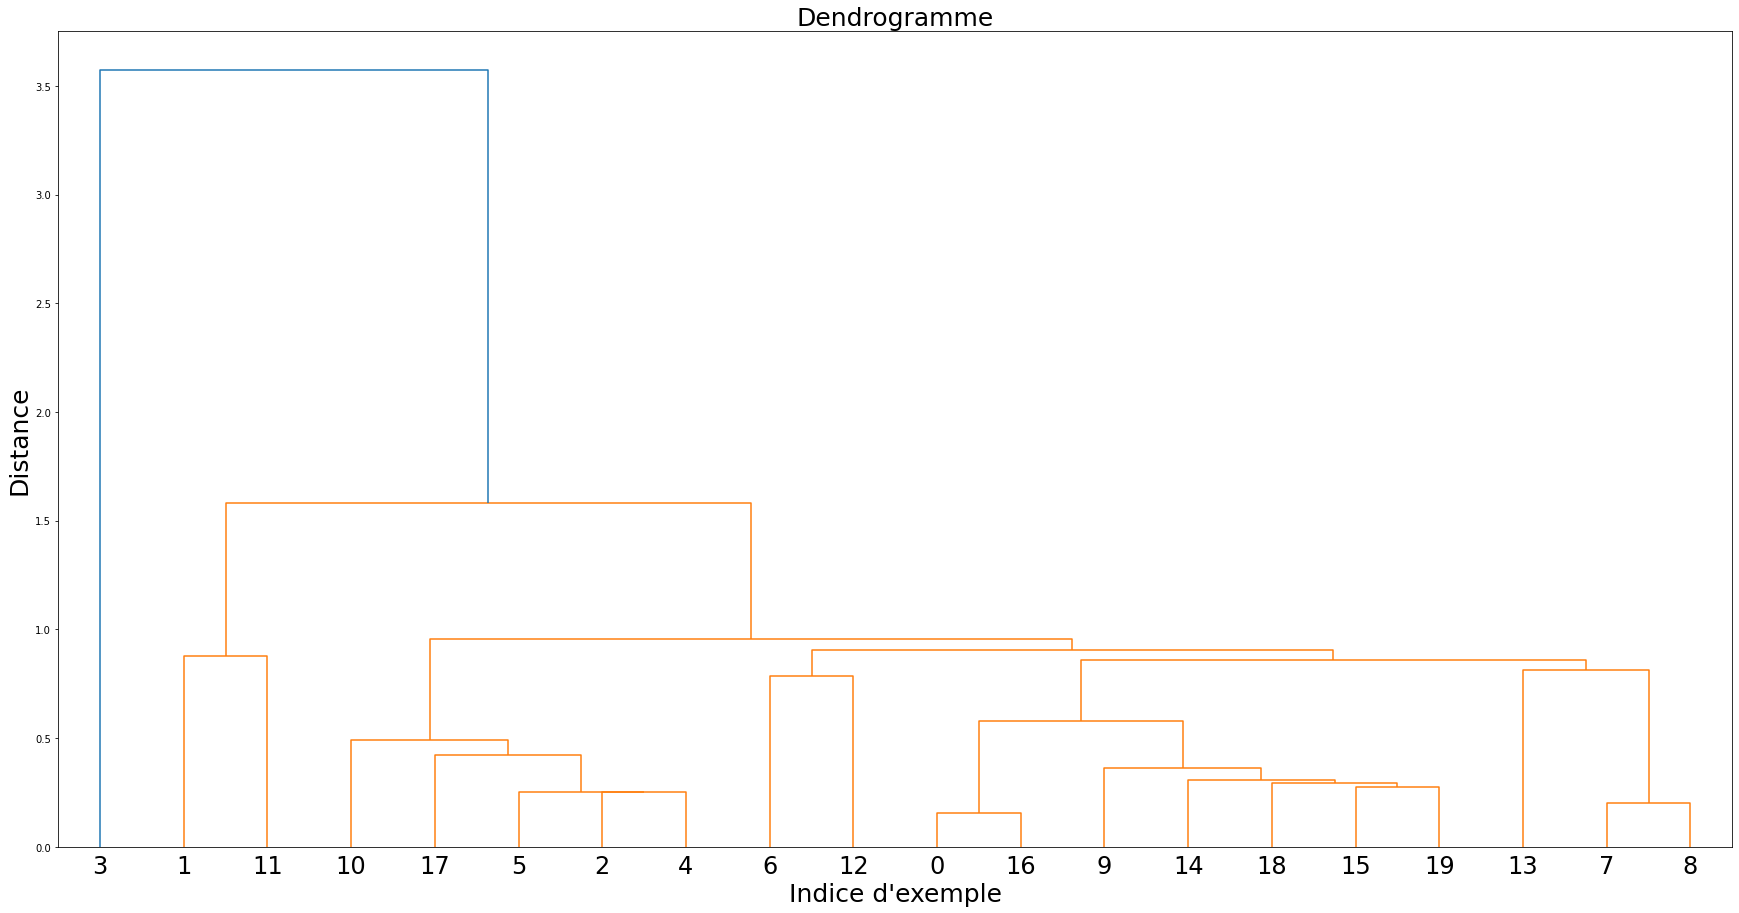

[[0, 16, 0.15514121759420235, 2],
 [7, 8, 0.20094298606115393, 2],
 [2, 4, 0.25052643145105596, 2],
 [5, 22, 0.2535069523636936, 3],
 [15, 19, 0.2736357638772213, 2],
 [18, 24, 0.2926328780936747, 3],
 [14, 25, 0.3082967275758381, 4],
 [9, 26, 0.36387711439638054, 5],
 [17, 23, 0.42097847271985045, 4],
 [10, 28, 0.4890437519807471, 5],
 [20, 27, 0.5780923145619368, 7],
 [6, 12, 0.7842824910764548, 2],
 [13, 21, 0.8128138329573871, 3],
 [30, 32, 0.8569366783509382, 10],
 [1, 11, 0.8772540810839015, 2],
 [31, 33, 0.903989656573582, 12],
 [29, 35, 0.9568496962970341, 17],
 [34, 36, 1.5827593107975773, 19],
 [3, 37, 3.571628908785206, 20]]

In [82]:
clustering_hierarchique_simplee(data_Paris_norm, dist_func=dist_manhattan, dendrogramme=True)

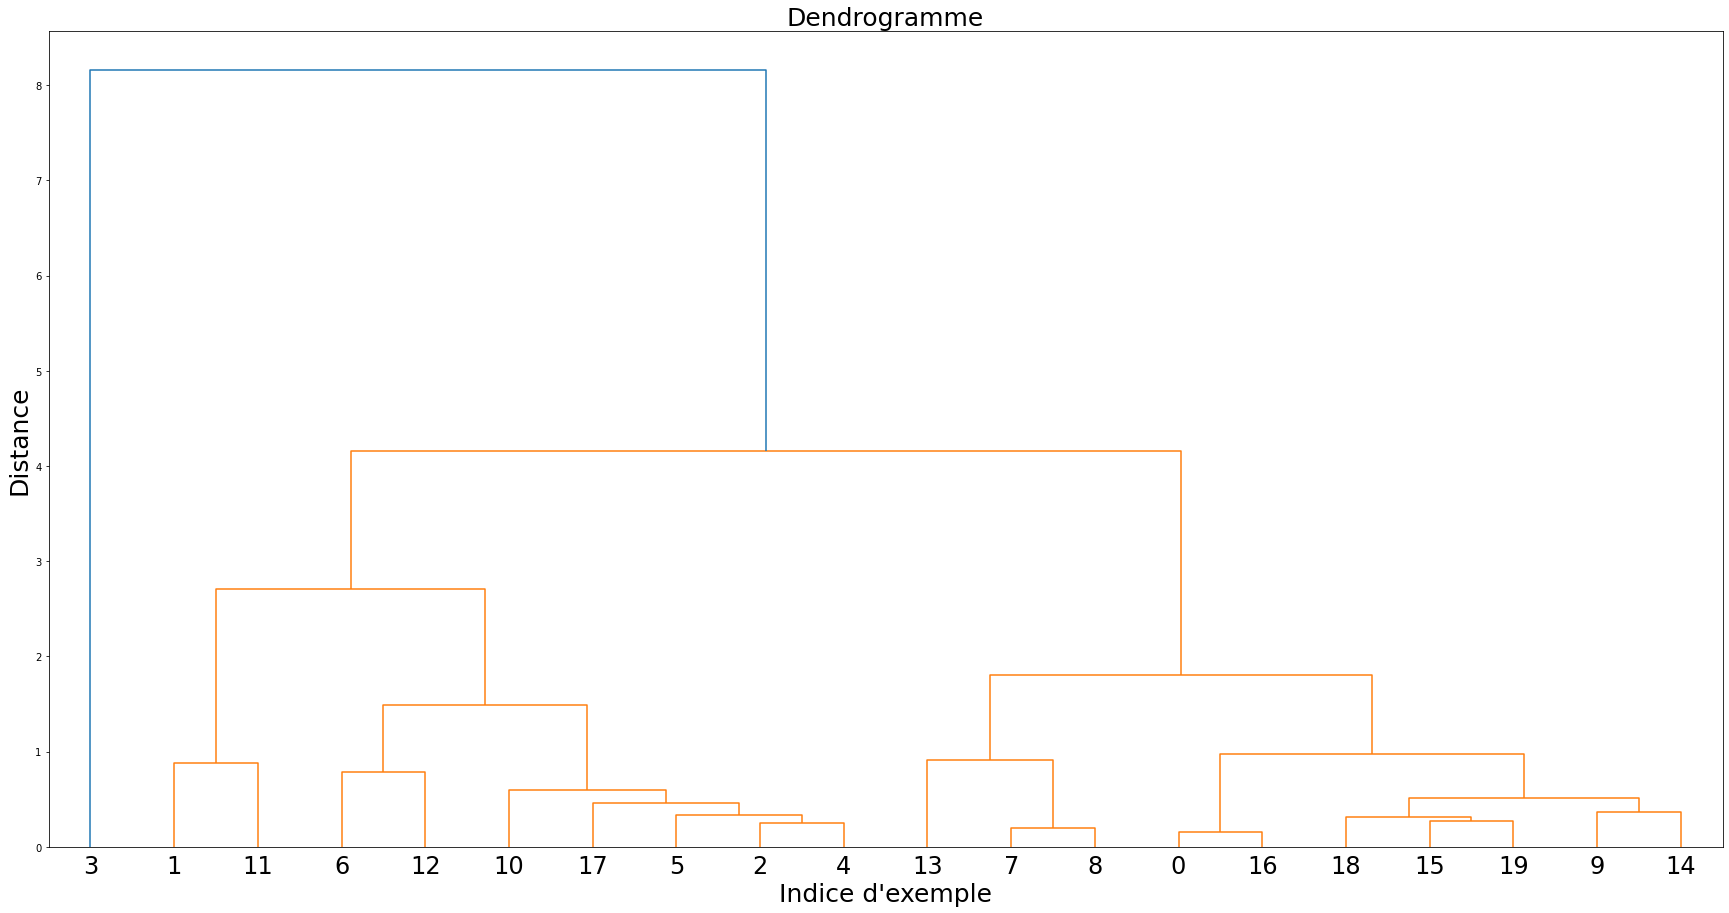

[[0, 16, 0.15514121759420235, 2],
 [7, 8, 0.20094298606115393, 2],
 [2, 4, 0.25052643145105596, 2],
 [15, 19, 0.2736357638772213, 2],
 [18, 23, 0.3180815425612187, 3],
 [5, 22, 0.3297119238722759, 3],
 [9, 14, 0.36387711439638054, 2],
 [17, 25, 0.4610518254692189, 4],
 [24, 26, 0.5157552213280464, 5],
 [10, 27, 0.6013932168959444, 5],
 [6, 12, 0.7842824910764548, 2],
 [1, 11, 0.8772540810839015, 2],
 [13, 21, 0.9087329739394056, 3],
 [20, 28, 0.9794872340904865, 7],
 [30, 29, 1.485911414111092, 7],
 [32, 33, 1.8094030213672443, 10],
 [31, 34, 2.7077180878134364, 9],
 [36, 35, 4.16014790322501, 19],
 [3, 37, 8.157328597482948, 20]]

In [83]:
clustering_hierarchique_average(data_Paris_norm, dist_func=dist_manhattan, dendrogramme=True)

## Questions de cours (à faire chez vous, sur papier)

Pour vous entraîner sans machine...

<font size="+1" color="RED"><b>[Q]</b></font> Montrer que la distance de Manhattan est bien une mesure de distance.

<font size="+1" color="RED"><b>[Q]</b></font> Dans le cours, 4 approches possibles ont été données afin de calculer la distance entre 2 groupes :
- l'approche du chaînage minimum est appelée "simple linkage"
- l'approche du chaînage maximum, est appelée "complete linkage"
- l'approche du chaînage moyenne est appelée "average linkage"
- l'approche du par centre de gravité est appelée "centroid linkage"

On considère une mesure de distance $d$. Soit $A =\{a_1,a_2,...,a_{|A|}\}$ et $B =\{b_1,b_2,...,b_{|B|}\}$ deux groupes d'exemples. Donner l'expression de la distance entre $A$ et $B$ pour chacune des approches.


<font size="+1" color="RED"><b>[Q]</b></font> En utilisant la distance euclidienne et l'approche "centroid linkage", appliquer, "à la main", l'algorithme de clustering hiérarchique, méthode par agglomération, sur les données fournies sur le transparent 10 du cours 2 (coin haut gauche). Dans cette page, les données correspondent à 9 points dans un espace 2D: $X_1 \times X_2$. Le point 1 est le point de coordonnées $(-0.5, -1.0)$, etc. 
Construire le dendrogramme correspondant.

rem : dans la page du cours, les 3 premiers clusters construits sont donnés.


<font size="+1" color="RED"><b>[Q]</b></font> *(examen 2018)*
On considère la base d'apprentissage de $[0,10]\times [0,10]$ contenant les 7 exemples suivants: $\mathcal{X}=\{(1,2)$, $(1,4)$, $(3,4)$, $(3,5)$, $(6,2)$, $(6,5)$, $(8,3)\}$ (remarque: cette base est déjà normalisée).
En détaillant les étapes et en expliquant les calculs réalisés et les regroupements effectués, appliquer sur $\mathcal{X}$ l'algorithme de classification hiérarchique, version ascendante, en utilisant l'approche ``centroid linkage'' et la distance euclidienne.  Donner le dendrogramme obtenu.
<font color="RED" size="+1">**[Q]**</font> Si on rajoute l'exemple $(5,5)$ dans $\mathcal{X}$ de la question précédente, sans ré-appliquer l'algorithme donner, en les justifiant, les modifications apportées au dendrogramme précédent par l'ajout de cet exemple.